# PDE solvers

This Jupyter notebook implements several different methods that solve the differential equation 
$$\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{\partial u(x,t)}{\partial t}$$
where 
$$t>0, x \in [0,L]$$
and with the initial conditions at $t=0$ as 
$$ u(x,0)=\sin(\pi x), \quad 0<x<L$$
The boundary conditions are 
$$u(0,t)=0, \quad t\geq 0 $$ 
$$u(L,t)=0, \quad t\geq 0 $$ 

The derivation of the schemes are found in the report

First off, let's import the modules. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import cm
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm
from matplotlib import rc

#Latex font for plots
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
rc('font', family='serif')
plt.rcParams.update({'font.size': 10}) # Setting all font sizes



/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

## Different PDE-solvers

Here we have implemented different PDE-solvers. Choose the correct step length, and run the rest of the cells for optimal execution.

In [2]:
import numpy, sys, math
from  matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import cm
import numpy as np
import os

from PDE_solvers import *

print("Which step size of Delta x do you want to run")
print("dx = 0.1: Write: '0.1' ")
print("dx = 0.01: Write: '0.01' ")

# Step length in x
dx      =   float(input())

# Number of integration points along x-axis
N       =   int(1.0/dx)

# Step length in time
dt      =   0.5*dx*dx
# Number of time steps till final time
T       =   int(1.0/dt)

L = 1
x = numpy.linspace (0,1,N+2)
t = np.linspace(0,1,T)
alpha = dt/(dx**2)

Which step size of Delta x do you want to run
dx = 0.1: Write: '0.1' 
dx = 0.01: Write: '0.01' 
0.1


### Forward Euler  

In [3]:


uf = np.zeros((t.size,x.size))


#Initial codition
uf[0,:] = g(x)
uf[0,0] = uf[0,N+1] = 0.0 #Implement boundaries rigidly

forward_euler(alpha,uf,N,T)

### Backward Euler

In [4]:
ub = np.zeros((t.size,x.size))


#Initial codition
ub[0,:] = g(x)
ub[0,0] = ub[0,N+1] = 0.0 #Implement boundaries rigidly

backward_euler(alpha,ub,N,T)

### Crank-Nicholsen

In [5]:
uc = np.zeros((t.size,x.size))


#Initial codition
uc[0,:] = g(x)
uc[0,0] = uc[0,N+1] = 0.0 #Implement boundaries rigidly

crank_nicolson(alpha,uc,N,T)


# Neural Network solver

The Neural Network does not follow the stability criteria as the rest of the implemented methods. For the neural network we have implemented the criteria $dt = dx$. The reason for this is simply that the run time required to execute the neural network for $dt = 0.5dx^2$ would be too long and need of large memory. Therefore, if you are running this code for $dx = 0.01$, decrease the number of iterations of the neural network, cause for $10^5s$ number of iterations the runtime for NN is approximately 2 hours.

In [6]:
# Defining variables
num_iter = 100 # Number of iterations
num_hidden_neurons = [90] # Number of hidden neurons in each layer
string = "Adam" # Choosing which Gradient Descent to use, eihter Adam or GD
learning_rate = 0.0  # When using Adam as GD learning_rate is not needed, but when GD is used a learning_rate needs to be specified


print("\n The PDE solver you are executing is:")
print("Deep Neural Network with %d layer" %len(num_hidden_neurons))

T1, x_mesh, t_mesh, u_dnn = NN_PDE(dx, num_iter, num_hidden_neurons, string, learning_rate)


 The PDE solver you are executing is:
Deep Neural Network with 1 layer

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where





100%|██████████| 100/100 [00:01<00:00, 64.11it/s]


# Analytical Solution

In [7]:
x_analytic, t_analytic = np.meshgrid(x,t)
x_analytic = x_analytic.ravel()
t_analytic = t_analytic.ravel()

analytic = np.exp(-np.pi**2*t_analytic)*np.sin(np.pi*x_analytic)
Analytic = analytic.reshape((int(1.0/dt),int(1.0/dx)+2))

### Plotting

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


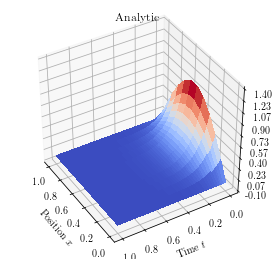

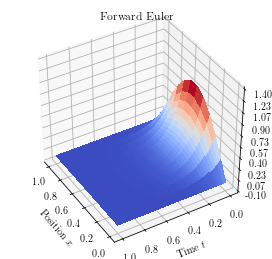

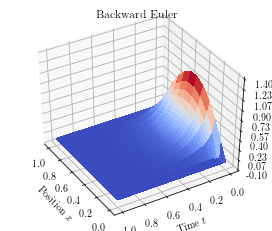

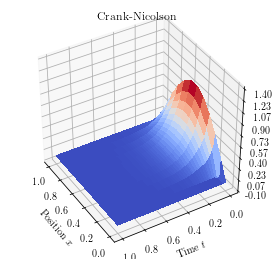

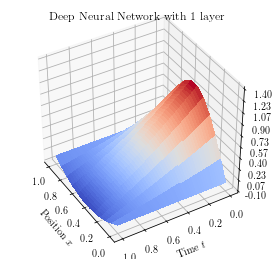

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


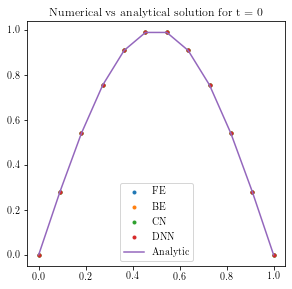


 Time = 0.0

 Max absolute difference between Forward Euler & Analytic = 
1.2246467991473532e-16

 Max absolute difference between Backward Euler & Analytic = 
1.2246467991473532e-16

 Max absolute difference between Crank-Nicolson & Analytic = 
1.2246467991473532e-16

 Max absolute difference between Deep Neural Network & Analytic = 
0.0


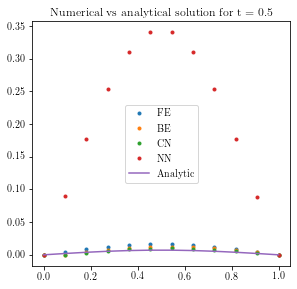


 Time = 0.5

 Max absolute difference between Forward Euler & Analytic = 
0.009389337592439524

 Max absolute difference between Backward Euler & Analytic = 
0.005167853738198763

 Max absolute difference between Crank-Nicolson & Analytic = 
0.0026952184284149746

 Max absolute difference between Deep Neural Network & Analytic = 
0.33300249645914687


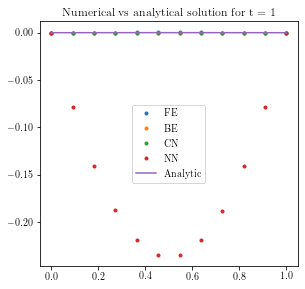


 Time = 1.0

 Max absolute difference between Forward Euler & Analytic = 
0.00022412026769106388

 Max absolute difference between Backward Euler & Analytic = 
9.598687515191419e-05

 Max absolute difference between Crank-Nicolson & Analytic = 
4.16344690812117e-05

 Max absolute difference between Deep Neural Network & Analytic = 
0.23477055498045105


In [8]:

x,t = np.meshgrid(x,t)


fig = plt.figure();
w = 5.78851          # Latex document text width

fig.set_size_inches(w=w*0.8,h= 4.5)
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, Analytic, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("Analytic")
plt.savefig("plots/"+str(dx)+"/Analytic.pgf")
plt.show()


fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, uf, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("Forward Euler")
plt.savefig("plots/"+str(dx)+"/FE.pgf")
plt.show()

fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.0)
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, ub, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("Backward Euler")
plt.savefig("plots/"+str(dx)+"/BE.pgf")
plt.show()

fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, uc, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("Crank-Nicolson")
plt.savefig("plots/"+str(dx)+"/CN.pgf")
plt.show()


fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x_mesh, t_mesh, u_dnn, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
ax.set_title('Deep Neural Network with %d layer'%len(num_hidden_neurons))
plt.savefig("plots/"+str(dx)+"/NN.pgf")
plt.show()


x_analytic = np.linspace(0,L, N+2)
analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[0][0])
fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
plt.title("Numerical vs analytical solution for t = 0")
plt.plot(x[0], uf[0], ".")
plt.plot(x[0], ub[0], ".")
plt.plot(x[0], uc[0], ".")
plt.plot(x_mesh[0], u_dnn[0], ".")
plt.plot(x_analytic, analytic)
plt.legend(["FE", "BE", "CN", "DNN", "Analytic"])
plt.savefig("plots/"+str(dx)+"/Comparison_0.pgf")

plt.show()

print("\n Time = 0.0")
print("\n Max absolute difference between Forward Euler & Analytic = ")
print(np.max(abs(uf[0]-analytic)))

print("\n Max absolute difference between Backward Euler & Analytic = ")
print(np.max(abs(ub[0]-analytic)))

print("\n Max absolute difference between Crank-Nicolson & Analytic = ")
print(np.max(abs(uc[0]-analytic)))

print("\n Max absolute difference between Deep Neural Network & Analytic = ")
print(np.max(abs(u_dnn[0]-analytic)))

analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[int(T/2)][0])
fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
plt.title("Numerical vs analytical solution for t = 0.5")
plt.plot(x[0], uf[int(T/2)], ".")
plt.plot(x[0], ub[int(T/2)], ".")
plt.plot(x[0], uc[int(T/2)], ".")
plt.plot(x_mesh[0], u_dnn[int(T1/2)], ".")
plt.plot(x_analytic, analytic)
plt.legend(["FE", "BE", "CN", "NN", "Analytic"])
plt.savefig("plots/"+str(dx)+"/Comparison_0.5.pgf")
plt.show()

print("\n Time = 0.5")
print("\n Max absolute difference between Forward Euler & Analytic = ")
print(np.max(abs(uf[int(T/2)]-analytic)))

print("\n Max absolute difference between Backward Euler & Analytic = ")
print(np.max(abs(ub[int(T/2)]-analytic)))

print("\n Max absolute difference between Crank-Nicolson & Analytic = ")
print(np.max(abs(uc[int(T/2)]-analytic)))

print("\n Max absolute difference between Deep Neural Network & Analytic = ")
print(np.max(abs(u_dnn[int(T1/2)]-analytic)))

analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[T-1][0])
fig = plt.figure();
fig.set_size_inches(w=w*0.8,h= 4.5)
plt.title("Numerical vs analytical solution for t = 1")
plt.plot(x[0], uf[T-1], ".")
plt.plot(x[0], ub[T-1], ".")
plt.plot(x[0], uc[T-1], ".")
plt.plot(x_mesh[0], u_dnn[T1-1], ".")
plt.plot(x_analytic, analytic)
plt.legend(["FE", "BE", "CN", "NN", "Analytic"])
plt.savefig("plots/"+str(dx)+"/Comparison_1.pgf")
plt.show()

print("\n Time = 1.0")
print("\n Max absolute difference between Forward Euler & Analytic = ")
print(np.max(abs(uf[T-1]-analytic)))

print("\n Max absolute difference between Backward Euler & Analytic = ")
print(np.max(abs(ub[T-1]-analytic)))

print("\n Max absolute difference between Crank-Nicolson & Analytic = ")
print(np.max(abs(uc[T-1]-analytic)))

print("\n Max absolute difference between Deep Neural Network & Analytic = ")
print(np.max(abs(u_dnn[T1-1]-analytic)))
